###### **Random Forest Classification in Microsoft Azure**
The notebook presents a task carried out as part of a course on processing large datasets in the cloud (in this case, working with Azure Machine Learning Studio), during my postgraduate studies in Big Data – Engineering of Large Data Sets at the Polish-Japanese Academy of Information Technology (PJATK). The goal of the project is the practical application of machine learning in the cloud in the context of data analysis and understanding the process of building classification models in Python.

To begin, I import the libraries and methods necessary for the project, which will be used later.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Next, I import the data, which has been uploaded to the Azure service, into a DataFrame. I extract the features (X) and target (y) and split them into training and testing sets. 
The data was sourced from: https://archive.ics.uci.edu/dataset/186/wine+quality.

In [131]:
data = pd.read_csv('winequality-red.csv', sep=';')

X = data[[
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol']]

y = data[[
'quality'
     ]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

I look into the data sample using head method in Pandas.

In [140]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


I also checked the size and shape of the datasets to ensure that everything is correct.

In [142]:
print("Training sets:")
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

print(""*30)

print("Test sets:")
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Training sets:
Shape of X_train: (1359, 11)
Shape of y_train: (1359, 1)

Test sets:
Shape of X_test: (240, 11)
Shape of y_test: (240, 1)


I also tested the standardization of the data sets to check if it would improve the model's performance. However, it did not lead to any improvement, likely because the dataset is relatively small. Therefore, I decided not to include it in the final pipeline.

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

A RandomForestClassifier is initialized with the following parameters:
max_depth=10000: Sets the maximum depth of the decision trees. A high value allows trees to grow deeply and capture more complexity in the data.
min_samples_leaf=2: Ensures that each leaf contains at least 2 samples, which helps reduce overfitting by preventing overly specific splits.
random_state=12: Ensures reproducibility by fixing the random seed.
class_weight='balanced': Adjusts the weights of classes based on their frequencies in the data, which is particularly useful for imbalanced datasets.

At the end, I print the prediction results of my model using precision and recall. Deffinitions are below:
Precision and Recall: What Do They Tell Us?
Precision and recall are two key metrics used to evaluate the performance of classification models, especially in multi-class or imbalanced datasets. They provide insights into how well a model is performing in terms of correctly identifying and predicting classes.

1. Precision (Positive Predictive Value)
Precision answers the question:
"Of all the samples predicted as a certain class, how many were actually correct?"

Precision focuses on the accuracy of positive predictions.
High precision means that when the model predicts a sample belongs to a specific class, it is very likely to be correct.
Precision is especially important in scenarios where false positives have a high cost. For example:
Diagnosing a disease: Predicting someone is sick when they are not could lead to unnecessary treatments.
Spam filters: Classifying important emails as spam (false positives) can lead to losing critical information.


2. Recall (Sensitivity or True Positive Rate)
Recall answers the question:
"Of all the samples that truly belong to a certain class, how many were correctly identified by the model?"

Recall focuses on identifying all relevant samples for a given class.
High recall means that the model correctly identifies most of the actual instances of the class.
Recall is crucial in scenarios where false negatives have a high cost. For example:
Cancer detection: Missing a case (false negative) could have life-threatening consequences.
Fraud detection: Failing to identify fraudulent transactions could result in significant financial losses.


In [144]:
clf = RandomForestClassifier(max_depth=10000, min_samples_leaf=2, random_state=12, class_weight='balanced') 
clf.fit(X_train, y_train.values.ravel())

y_pred = clf.predict(X_test)

y_test_flat = y_test.values.ravel()  # Conversion to 1D (from Pandas DataFrame to Numpy Array)

precision = precision_score(y_test_flat, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test_flat, y_pred, average='macro')

print("Recall score:", recall)
print("Precision score", precision)

Recall score: 0.4255218855218856
Precision score 0.662011293590241


At the end I use code below to visualizes the confusion matrix for my predictions. This helps me to understand how well the model performs across all the classes.

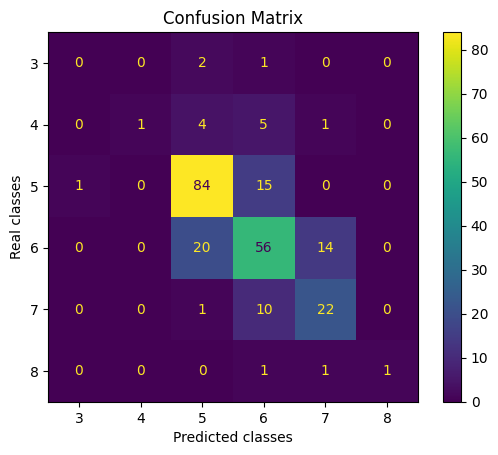

In [145]:
conf_matrix = confusion_matrix(y_test_flat, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap="viridis")
disp.ax_.set_title("Confusion Matrix") 
disp.ax_.set_xlabel("Predicted classes")
disp.ax_.set_ylabel("Real classes")
plt.show()